# Fitting A Model to Experimental Data

## Data and Model

We can use what we've learned in the Optimization exercise to fit a model to data in case we have to extract some model parameters from our experiment.

Imagine we're on Mars and we want to measure g, the gravitational acceleration on Mars. We throw a baseball into the air and, using a camera, record its trajectory as it falls.

Using constant-acceleration equations, we know we can write its trajectory as:

\begin{align}
x(t) &= x_0 + v_0 \cdot cos(\theta) \cdot t \\
y(t) &= y_0 + v_0 \cdot sin(\theta) \cdot t + \dfrac{1}{2} \cdot g \cdot t^2
\end{align}

Where $\theta$ is the angle from the horizontal at which we threw the baseball with speed $v_0$. We simplify this a little by just setting our starting point $(x_0, y_0)$ at $(0,0)$.

Let's open and plot our trajectory below ...

In [1]:
# Import some needed libraries
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ofile = open('mars_baseball_trajectory.txt', 'r')
# Read and print the first header line
header = ofile.readline()
print('header:')
print(header)
# Store the data in the following lines
x = []
y = []
for line in ofile:
    ls = line.strip().split()
    x.append(float(ls[0]))
    y.append(float(ls[1]))
x = np.array(x)
y = np.array(y)
ofile.close()

header:
#          x                    y



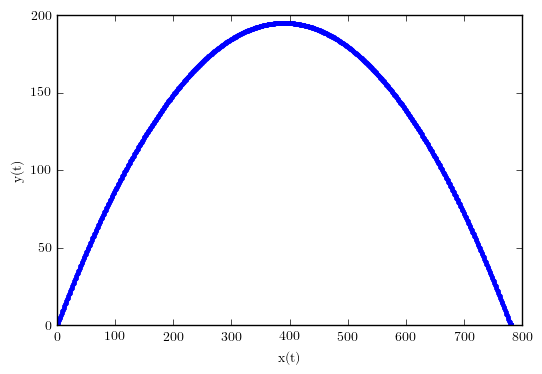

In [3]:
plt.plot(x,y, marker='.', linestyle='none')
plt.xlabel('x(t)')
plt.ylabel('y(t)')

Now, we measured the speed and angle of our throw to be $54 \ m/s$ at an angle of $45^\circ$ from the horizontal, so we can write:

\begin{align}
\theta &= 45^\circ \\
v_0 &= 54.0 \ m/s
\end{align}

And then our equations of motion become simply functions of $t$ with a single parameter $g$:

\begin{align}
x(t) &= \dfrac{54}{\sqrt{2}} \cdot t \\
y(t) &= \dfrac{54}{\sqrt{2}} \cdot t + \dfrac{1}{2} \cdot g \cdot t^2
\end{align}

Using the first equation, we can rewrite this trajectory as $y(x)$:

\begin{equation}
y(x) = x + \dfrac{1}{54^2} \cdot g \cdot x^2
\end{equation}

And we want to fit that to our trajectory data, which we'll denote as $y_d(x_d)$.

In [4]:
def ymodel(x, g):
    return x + (g*x**2)/(54.0**2)

## Fitting

We can use what we've learned about minimization to fit the above function to the data. To do that, we formulate the fitting task as a minimization.

One quantity that a good fit will minimize is the difference between the data $y_d(x)$ and the model function $y(x)$. We can quantify this with a number called the $\chi^2$ value of the fit, which is calculated as follows:

\begin{equation}
\chi^2 = \sum_{i = 1}^n \dfrac{\left(y_d(x_i) - y(x_i)\right)^2}{y(x_i)}
\end{equation}

The sum is over all $n$ data points.

For our problem, the $\chi^2$ value is a function of the fit parameter $g$ as follows:

\begin{equation}
\chi^2 = \chi^2 \left( g \right)
\end{equation}

In [5]:
def chi_squared(g):
    yfit = ymodel(x, g)
    chi2 = 0.0
    for yd, yf in zip(y, yfit):
        # Avoid y = 0 divisions!
        if yd != 0.0 and yf != 0.0:
            numerator = (yd - yf)**2
            chi2 += numerator/abs(yf)
    return chi2

In the minimization notebook we learned we could use SciPy to minimize functions like $\chi^2$, which we will do as follows.

First let's plot the trajectory for a few different values of g and see what ballpark value to initially guess.

(0, 250)

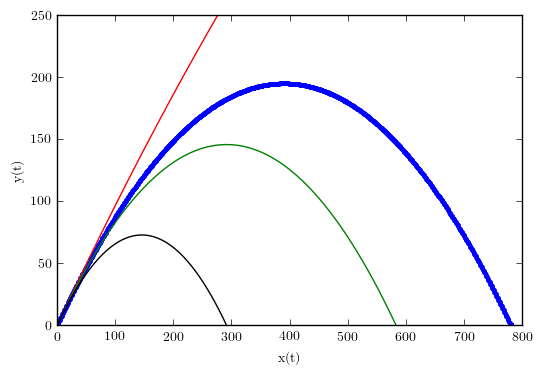

In [6]:
y1 = ymodel(x, -1.0)
y2 = ymodel(x, -5.0)
y3 = ymodel(x, -10.0)
plt.plot(x,y, marker='.', linestyle='none')
plt.plot(x,y1, color='red')
plt.plot(x,y2, color='green')
plt.plot(x,y3, color='black')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.ylim([0, 250])

We see that the green curve where we picked $g = -5 \ \frac{m}{s^2}$ is the closest to our data points in blue by far, so let's choose that as our initial guess for Mars' gravitational acceleration.

In [7]:
from scipy.optimize import minimize
ginit = -5
# Minimize function chi_squared starting with the guess of g
# Use the Nelder-Mead method
# Minimize f to a tolerance of 1e-6
# Display the optimization data
result = minimize(chi_squared, ginit, method='Nelder-Mead', tol=1e-6, 
                  options={'disp':True, 'maxiter':1000000})
print('Function minimum found at x = {}'.format(result.x))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 48
Function minimum found at x = [-3.73600006]


The above fit found the following results:

\begin{equation}
g_{mars} = -3.736 \ \frac{m}{s^2}
\end{equation}

Finally let's plot the fit on top of the data and see how well this procedure worked.

(0, 200)

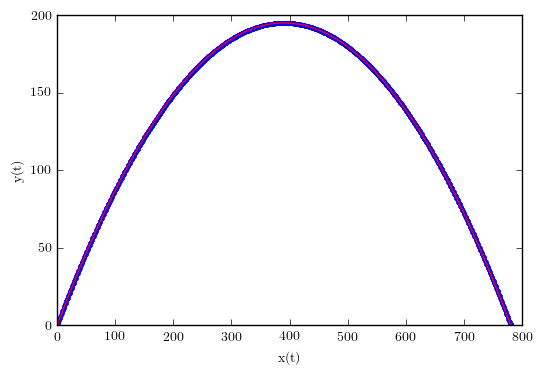

In [8]:
fit_g = result.x
fit_y = ymodel(x, fit_g)
plt.plot(x,y, marker='.', linestyle='none')
plt.plot(x,fit_y, color='red')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.ylim([0,200])

And we see this worked very well!